In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={"figure.figsize":(8, 5)})
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Franosei/Wine-Quality/main/Data/winequality.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
count = df["type"].value_counts()
count

white    4898
red      1599
Name: type, dtype: int64

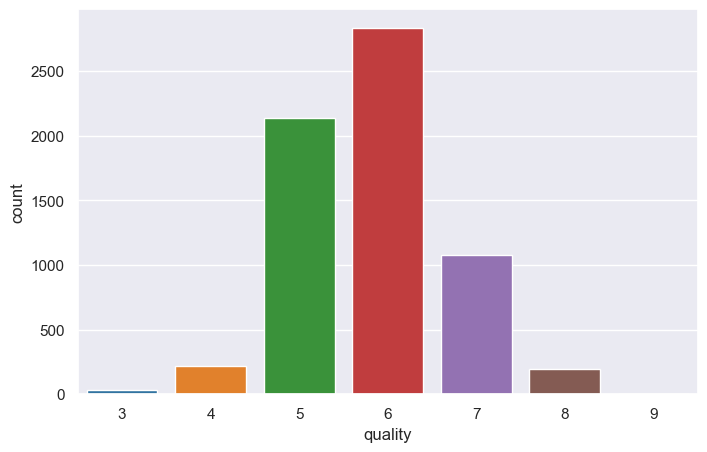

In [4]:
sns.countplot(x ='quality', data = df,palette="tab10")
plt.show()

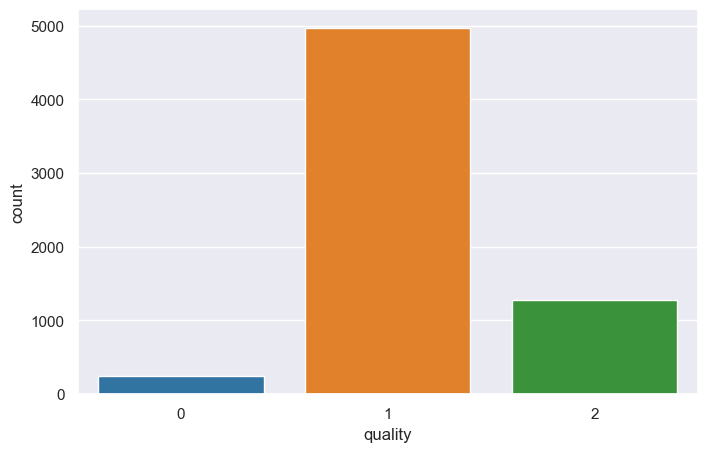

In [5]:
df.loc[df['quality'] <= 4, 'quality'] = 0
df.loc[df['quality'] == 5, 'quality'] = 1
df.loc[df['quality'] == 6, 'quality'] = 1
df.loc[df['quality'] > 6, 'quality'] = 2
sns.countplot(x ='quality', data = df,palette="tab10")
plt.show()

In [6]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().sum().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_data

,Total,Percent
fixed acidity,10,76.923077
pH,9,69.230769
volatile acidity,8,61.538462
sulphates,4,30.769231
citric acid,3,23.076923
residual sugar,2,15.384615
chlorides,2,15.384615
type,0,0.000000
free sulfur dioxide,0,0.000000
total sulfur dioxide,0,0.000000


In [7]:
#Less than 0.1% of missing row so we can drop those rows
missing_data['Total'].sum()/len(df)

0.005848853316915499

In [8]:
data = df.dropna()
data.isnull().sum().sort_values(ascending = False)

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
data["type"] = np.where(data["type"] == "white", 0, 1)
data["type"] = data["type"].astype('int')
data.head()

C:\Users\FrancisOsei\AppData\Local\Temp\ipykernel_27736\4246513822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["type"] = np.where(data["type"] == "white", 0, 1)
C:\Users\FrancisOsei\AppData\Local\Temp\ipykernel_27736\4246513822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["type"] = data["type"].astype('int')


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


# Data Visualization

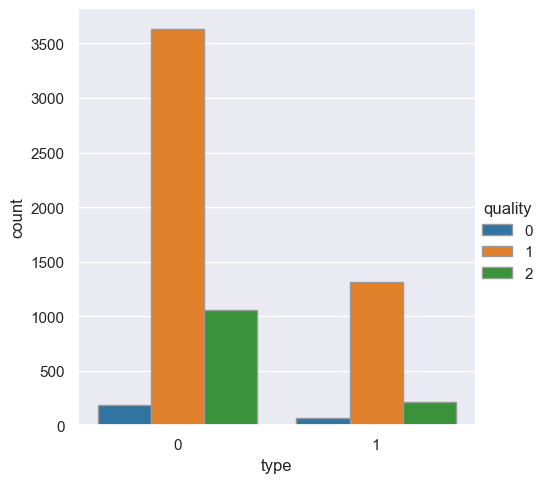

In [10]:
sns.catplot(
    data=data, x="type", hue="quality", kind="count",
    palette="tab10", edgecolor=".6",
)

<AxesSubplot:>

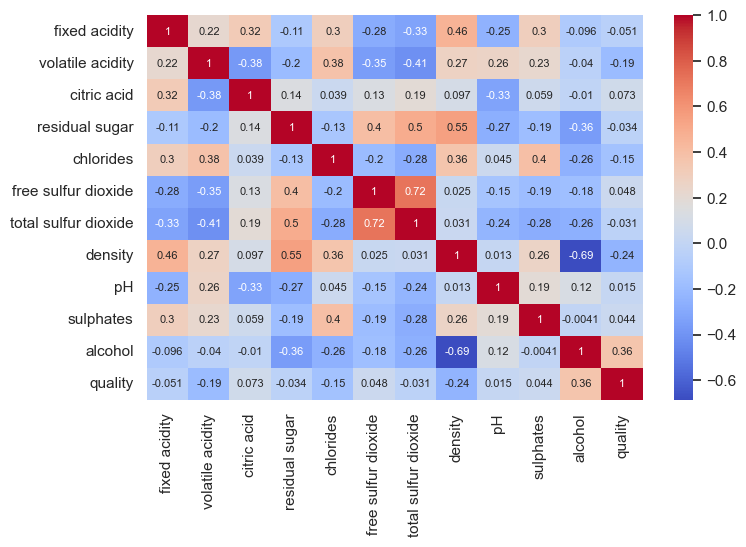

In [11]:
data_plot = data.loc[:, data.columns != 'type']
sns.heatmap(data_plot.corr(), annot = True, cmap = 'coolwarm',annot_kws={"fontsize":8})

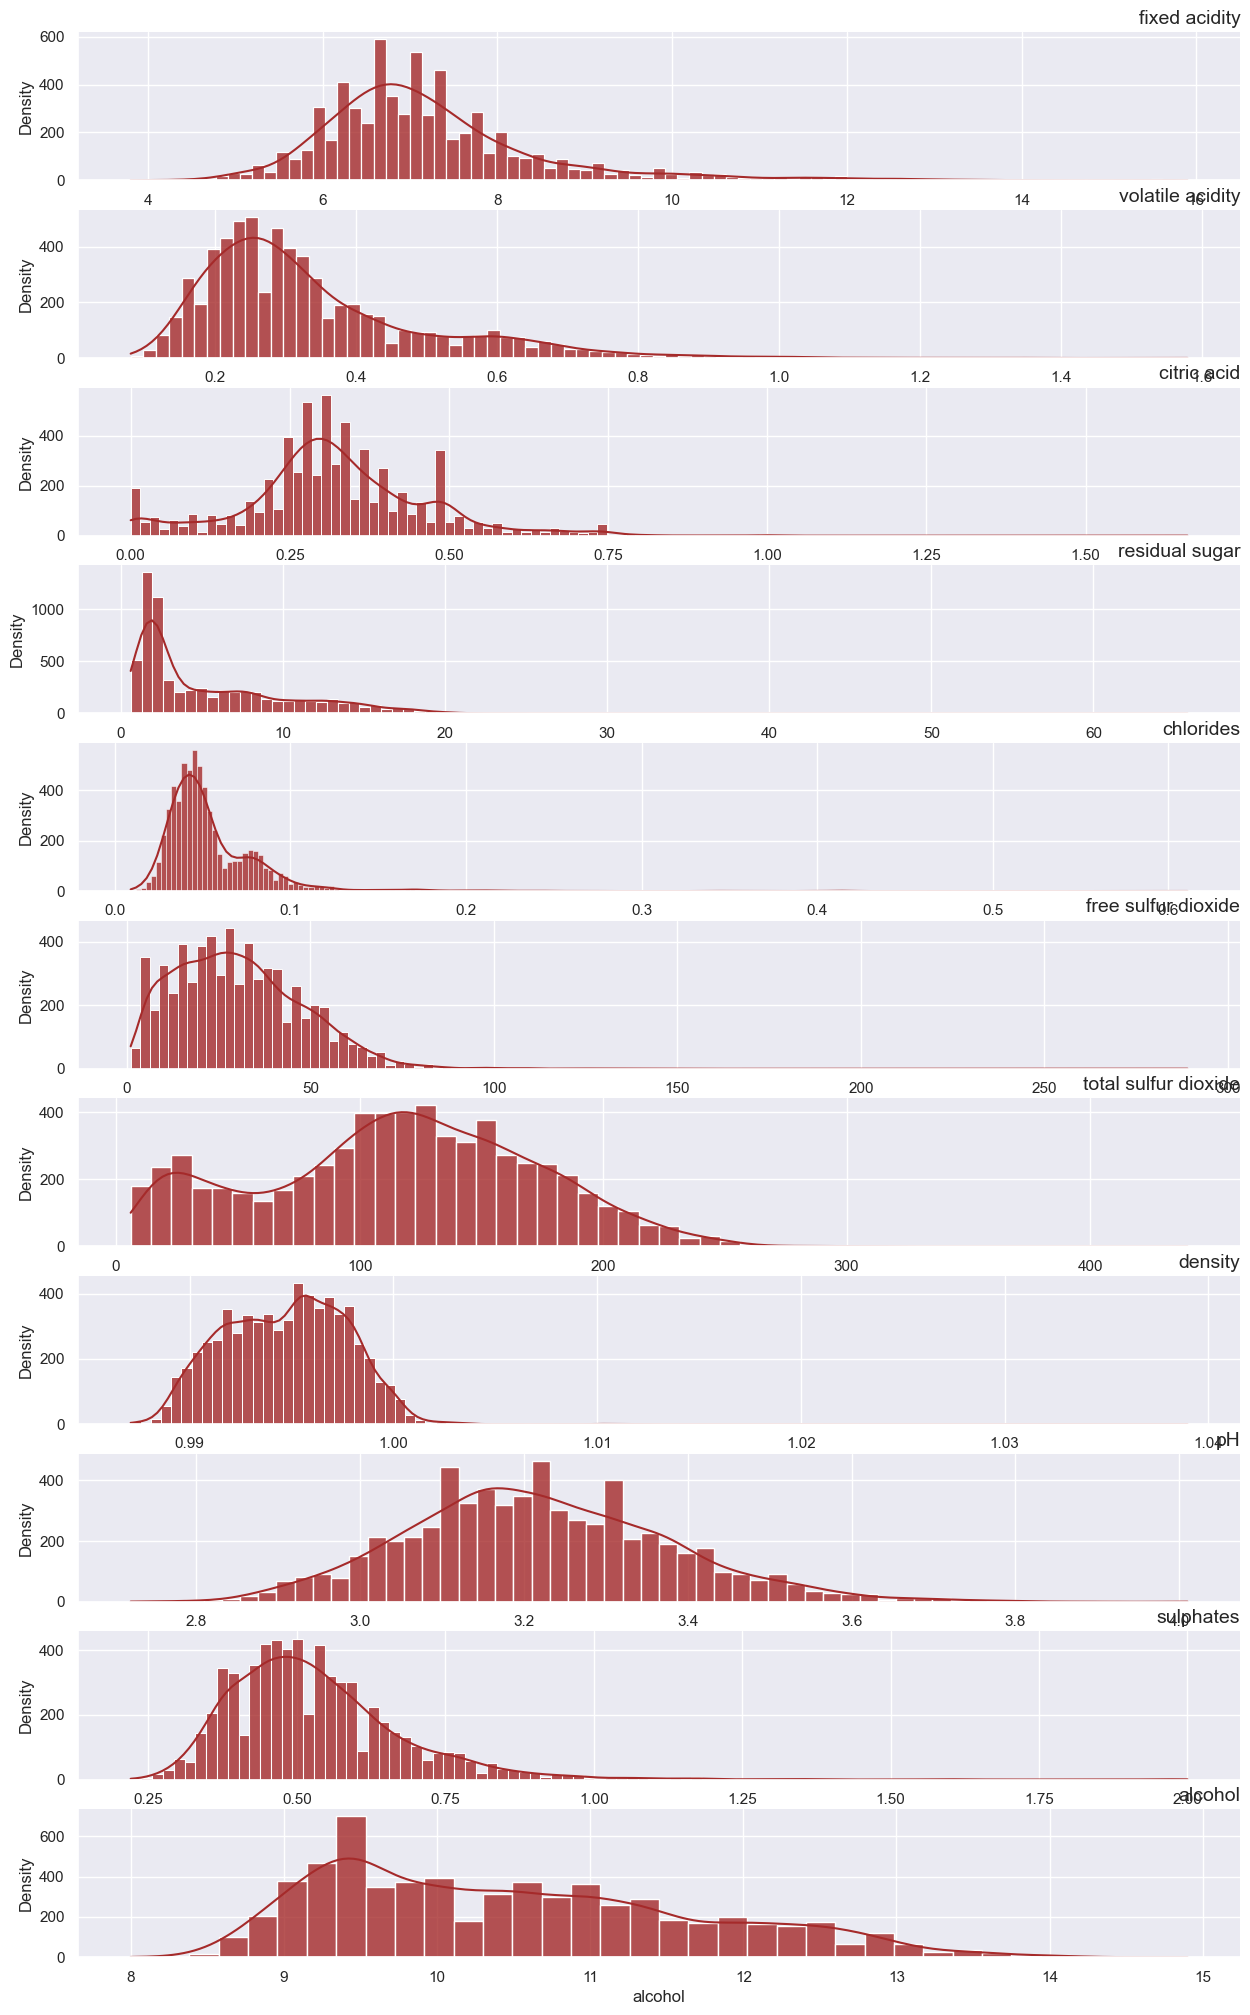

In [12]:
def features_hist(df):
    fig, axs = plt.subplots(nrows=df.shape[1], figsize=(15,25))
    for i, col in enumerate(df.columns):
        sns.histplot(data=df, x=col, kde=True, color='#A52A2A', alpha=0.8, ax=axs[i])
        axs[i].set_xlabel(col, fontsize=12)
        axs[i].set_ylabel('Density', fontsize=12)
        axs[i].set_title(f'{col}', fontsize=14,loc='right')
        sns.despine(ax=axs[i])
    plt.show()
features_hist(data_plot.drop('quality', axis=1))

# Data Splitting

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#data1 = data.loc[data['type'] == 0]
#data1 = data1.drop(['type'],axis=1)
#data1

In [15]:
y = data['quality']
X = data.drop(['quality'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Data Engineering of the Training Data

In [16]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [17]:
# Normalizing the the independent variables
col = x_train.loc[:, x_train.columns != 'type']
for column in col.columns:
    x_train[column] = x_train[column]  / x_train[column].abs().max()

In [18]:
#concatenating the response and the independent variable
train_df= pd.concat([y_train, x_train], axis=1)
train_df.head()

,quality,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,0,0.435897,0.481203,0.048193,0.147416,0.101473,0.089965,0.322727,0.959787,0.840399,0.232323,0.626761
1,1,0,0.455128,0.157895,0.433735,0.024316,0.273322,0.224913,0.272727,0.955976,0.740648,0.257576,0.647887
2,1,0,0.371795,0.172932,0.162651,0.027356,0.070376,0.083045,0.156818,0.956034,0.842893,0.156566,0.661972
3,1,0,0.448718,0.180451,0.204819,0.021277,0.050736,0.093426,0.243182,0.952858,0.763092,0.196970,0.838028
4,1,1,0.480769,0.315789,0.192771,0.041033,0.109656,0.024221,0.056818,0.958902,0.807980,0.222222,0.732394


[Text(0, 0, 'fixed acidity'),
 Text(1, 0, 'volatile acidity'),
 Text(2, 0, 'citric acid'),
 Text(3, 0, 'residual sugar'),
 Text(4, 0, 'chlorides'),
 Text(5, 0, 'free sulfur dioxide'),
 Text(6, 0, 'total sulfur dioxide'),
 Text(7, 0, 'density'),
 Text(8, 0, 'pH'),
 Text(9, 0, 'sulphates'),
 Text(10, 0, 'alcohol')]

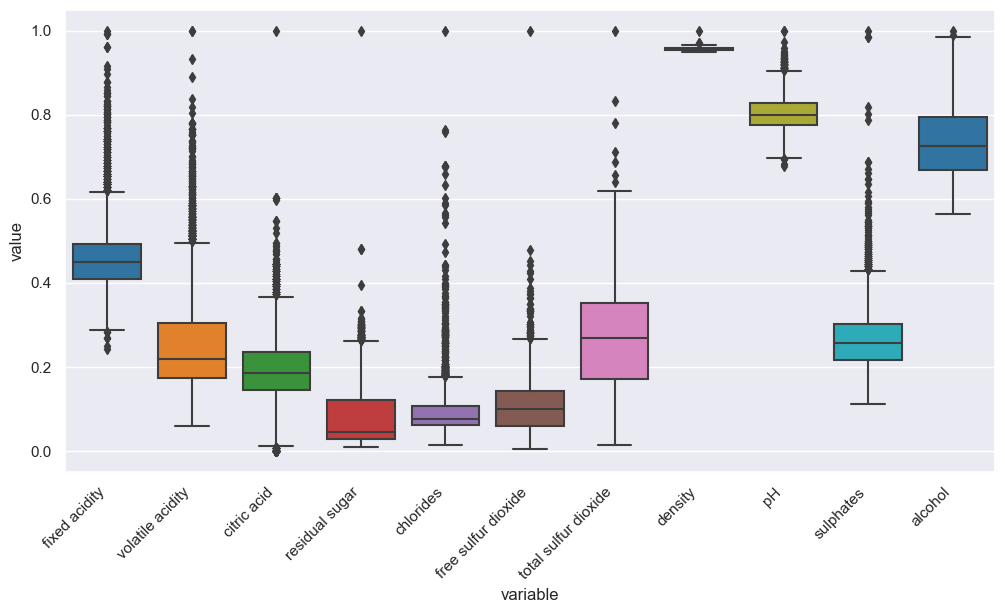

In [19]:
#Checking for outliers using Boxplot
df_melted = pd.melt(train_df.iloc[:,2:13])
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=df_melted,palette="tab10")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'fixed acidity'),
 Text(1, 0, 'volatile acidity'),
 Text(2, 0, 'citric acid'),
 Text(3, 0, 'residual sugar'),
 Text(4, 0, 'chlorides'),
 Text(5, 0, 'free sulfur dioxide'),
 Text(6, 0, 'total sulfur dioxide'),
 Text(7, 0, 'density'),
 Text(8, 0, 'pH'),
 Text(9, 0, 'sulphates'),
 Text(10, 0, 'alcohol')]

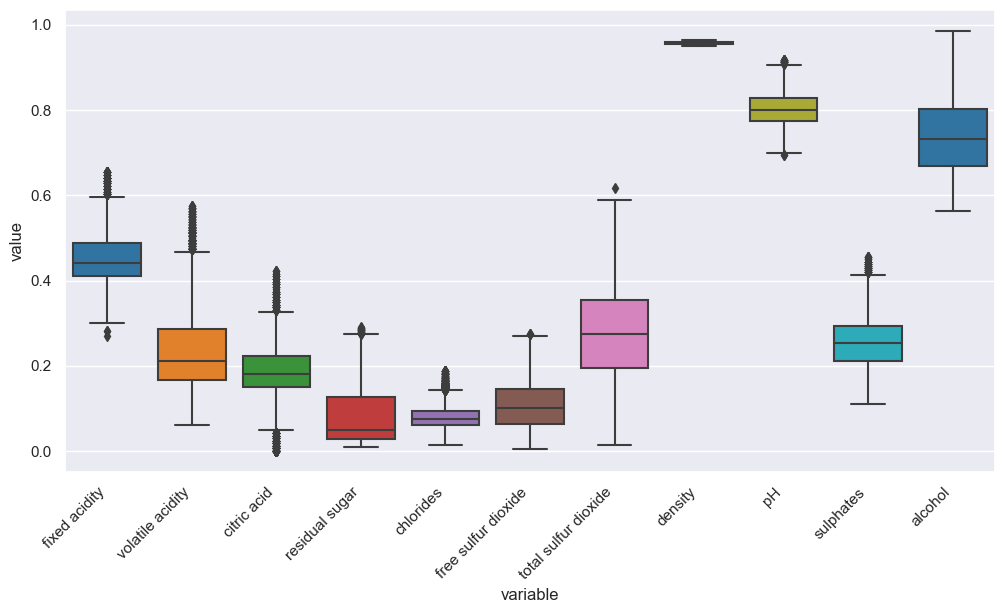

In [100]:
#Removing Outliers from my training data
from scipy import stats
def remove_outliers(df, threshold=3):
    df_clean = df.copy()
    for col in df_clean.select_dtypes(include=[np.float64]):
        zscore = np.abs(stats.zscore(df_clean[col]))
        outliers = zscore > threshold
        df_clean.loc[outliers, col] = np.nan
    df_clean.dropna(inplace=True)
    return df_clean
train_df = remove_outliers(train_df)
#Checking if outliers have been removed
df_melted = pd.melt(train_df.iloc[:,1:12])
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=df_melted,palette="tab10")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [21]:
#One hot encoding categorical variables
train_df = pd.get_dummies(train_df, columns = ['type'],drop_first=True)
train_df

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_1
0,0,0.435897,0.481203,0.048193,0.147416,0.101473,0.089965,0.322727,0.959787,0.840399,0.232323,0.626761,0
2,1,0.371795,0.172932,0.162651,0.027356,0.070376,0.083045,0.156818,0.956034,0.842893,0.156566,0.661972,0
3,1,0.448718,0.180451,0.204819,0.021277,0.050736,0.093426,0.243182,0.952858,0.763092,0.196970,0.838028,0
4,1,0.480769,0.315789,0.192771,0.041033,0.109656,0.024221,0.056818,0.958902,0.807980,0.222222,0.732394,1
5,1,0.500000,0.225564,0.216867,0.069909,0.039280,0.069204,0.450000,0.954994,0.763092,0.333333,0.838028,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5165,1,0.467949,0.225564,0.253012,0.111702,0.040917,0.176471,0.397727,0.955553,0.758105,0.161616,0.802817,0
5166,2,0.429487,0.157895,0.204819,0.022796,0.057283,0.155709,0.279545,0.952367,0.807980,0.181818,0.887324,0
5167,1,0.487179,0.233083,0.174699,0.159574,0.065466,0.072664,0.329545,0.959210,0.758105,0.176768,0.661972,0
5168,2,0.397436,0.571429,0.006024,0.048632,0.067103,0.062284,0.272727,0.953108,0.798005,0.474747,0.964789,0


<AxesSubplot:ylabel='None'>

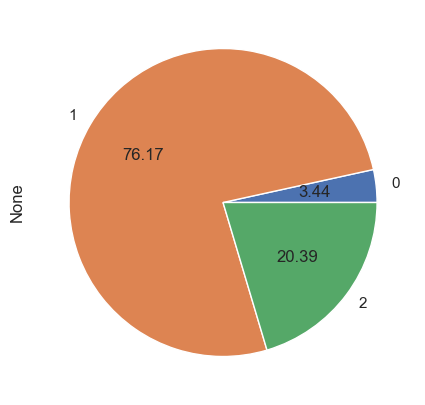

In [22]:
#Checking for imbalance in our dependent variable
train_df.groupby('quality').size().plot(kind='pie', autopct='%.2f')

In [23]:
train_df["quality"].value_counts()

1    3634
2     973
0     164
Name: quality, dtype: int64

In [24]:
#Balancing the dataset
from imblearn.over_sampling import SMOTE
Y_train = train_df['quality']
X_train = train_df.drop(['quality'],axis=1)
oversample = SMOTE()
train_x, train_y = oversample.fit_resample(X_train, Y_train )

<AxesSubplot:ylabel='None'>

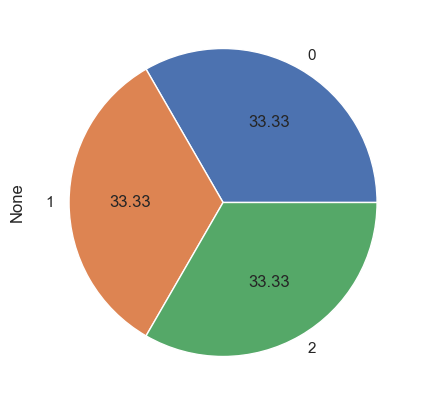

In [25]:
df1 = pd.concat([train_x, train_y], axis=1)
df1.groupby('quality').size().plot(kind='pie', autopct='%.2f')

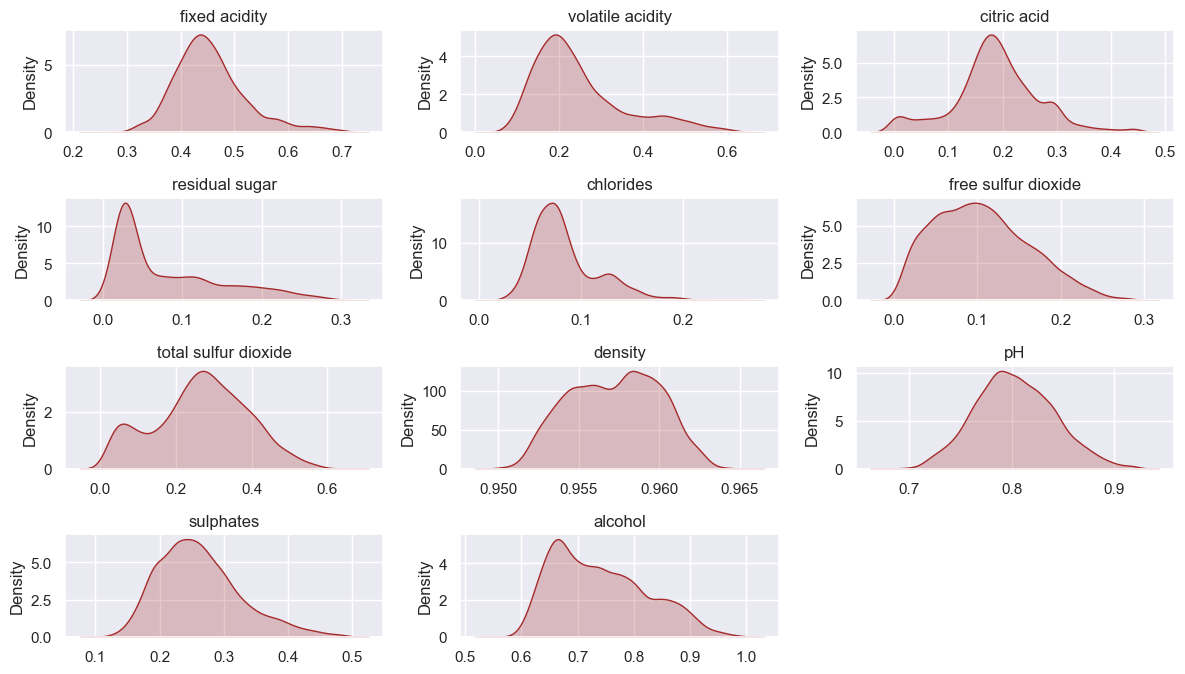

In [26]:
# Checking the distribution of my independent variables
float_columns = train_x.select_dtypes(include=[float]).columns
num_plots = len(float_columns)
num_rows = int(num_plots / 2) if num_plots % 2 == 0 else int(num_plots / 2) + 1
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
axes = axes.flatten()
for i, col in enumerate(float_columns):
    sns.kdeplot(X_train[col], shade=True,color='#A52A2A', ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Density")
if num_plots < len(axes):
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


In [27]:
#df1['alcohol_density'] = df1['alcohol']-df1['density']
#df1 = df1.drop(['total sulfur dioxide'],axis=1)
#df1 = df1.drop(['density'],axis=1)
#df1['acidity'] = df1["fixed acidity"]+df1['volatile acidity']+df1['citric acid']

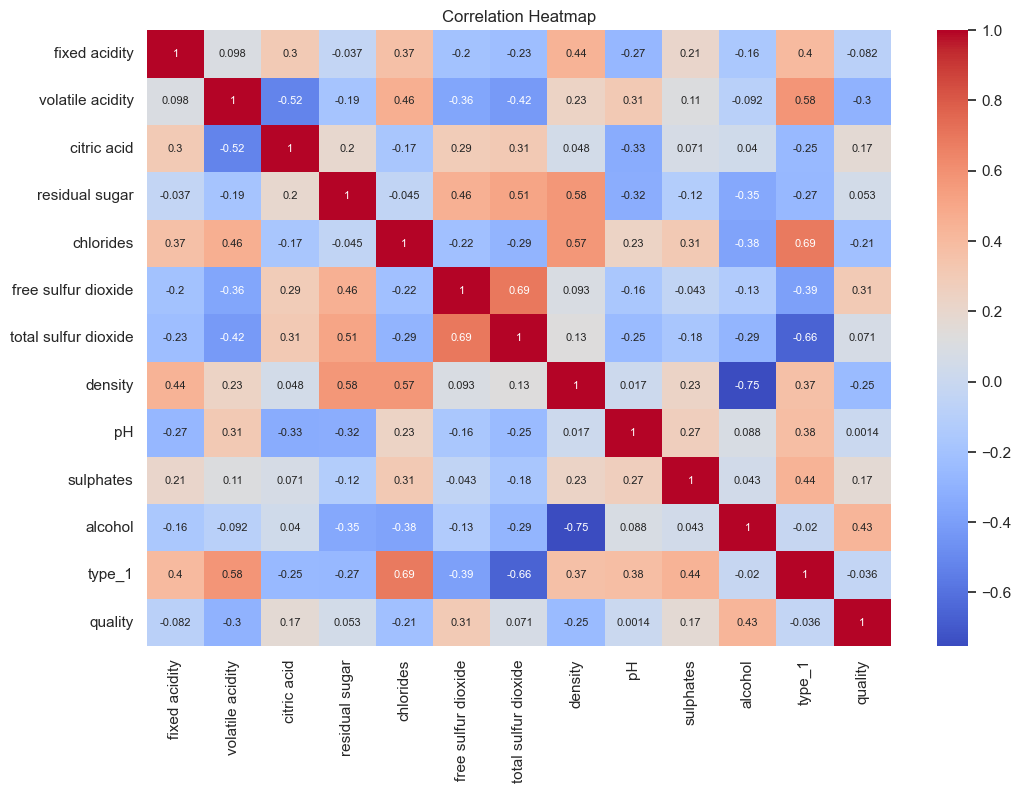

In [28]:
corr_matrix = df1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',annot_kws={"fontsize":8})
plt.title('Correlation Heatmap')
plt.show()

In [29]:
df1 = df1.drop(['density'],axis=1)
df1 = df1.drop(['free sulfur dioxide'],axis=1)

In [30]:
#high_corr_pairs = []
#columns = corr_matrix.columns

#for i in range(len(columns)):
#    for j in range(i + 1, len(columns)):
#        if abs(corr_matrix.iloc[i, j]) > 0.70:
#            high_corr_pairs.append((columns[i], columns[j]))
#columns_to_drop = set()
#for pair in high_corr_pairs:
#    col1, col2 = pair
#    if col1 not in columns_to_drop:
#        columns_to_drop.add(col2)
#df_filtered = df.drop(columns=columns_to_drop)

#print(df_filtered)


In [31]:
from sklearn.base import clone
from sklearn.metrics import accuracy_score
class OrdinalClassifier():
    def __init__(self, clf):
        self.clf = clf
        self.clfs = {}

    def fit(self, X, y):
        self.unique_class = np.sort(np.unique(y))
        if self.unique_class.shape[0] > 2:
            for i in range(self.unique_class.shape[0] - 1):
                # for each k - 1 ordinal value we fit a binary classification problem
                binary_y = (y > self.unique_class[i]).astype(np.uint8)
                clf = clone(self.clf)
                clf.fit(X, binary_y)
                self.clfs[i] = clf

    def predict_proba(self, X):
        clfs_predict = {k: self.clfs[k].predict_proba(X) for k in self.clfs}
        predicted = []
        for i, y in enumerate(self.unique_class):
            if i == 0:
                # V1 = 1 - Pr(y > V1)
                predicted.append(1 - clfs_predict[i][:, 1])
            elif i in clfs_predict:
                # Vi = Pr(y > Vi-1) - Pr(y > Vi)
                predicted.append(clfs_predict[i - 1][:, 1] - clfs_predict[i][:, 1])
            else:
                # Vk = Pr(y > Vk-1)
                predicted.append(clfs_predict[i - 1][:, 1])
        return np.vstack(predicted).T

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

    def score(self, X, y, sample_weight=None):
        _, indexed_y = np.unique(y, return_inverse=True)
        return accuracy_score(indexed_y, self.predict(X), sample_weight=sample_weight)

# Machine Learning Models

In [32]:
col = x_test.loc[:, x_test.columns != 'type']
for column in col.columns:
    x_test[column] = x_test[column]  / x_test[column].abs().max()
test_x = pd.get_dummies(x_test,drop_first=True, columns = ['type'])
test_x = test_x.drop(['density'],axis=1)
test_x = test_x.drop(['free sulfur dioxide'],axis=1)
#test_x['alcohol_density'] = test_x['alcohol']-test_x['density']
#test_x = test_x.drop(['alcohol'],axis=1)
#test_x = test_x.drop(['density'],axis=1)
#test_x['alcohol/volatile'] = test_x['alcohol']/ test_x['volatile acidity']
#test_x['acidity'] = test_x["fixed acidity"]+test_x['volatile acidity']+test_x['citric acid']
test_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,type_1
2404,0.616352,0.101266,0.373984,0.069098,0.075410,0.422764,0.779487,0.335,0.644295,0
4089,0.427673,0.170886,0.195122,0.176583,0.160656,0.413008,0.807692,0.245,0.644295,0
5416,0.685535,0.132911,0.398374,0.107486,0.144262,0.104065,0.825641,0.340,0.785235,1
1313,0.578616,0.202532,0.341463,0.049904,0.075410,0.604878,0.789744,0.240,0.644295,0
2500,0.427673,0.132911,0.292683,0.694818,0.075410,0.432520,0.838462,0.240,0.590604,0
...,...,...,...,...,...,...,...,...,...,...
37,0.440252,0.208861,0.260163,0.046065,0.086885,0.448780,0.802564,0.140,0.751678,0
3292,0.415094,0.177215,0.333333,0.268714,0.075410,0.630894,0.805128,0.240,0.630872,0
4470,0.295597,0.091772,0.235772,0.038388,0.068852,0.292683,0.964103,0.245,0.758389,0
4760,0.415094,0.107595,0.211382,0.284069,0.085246,0.416260,0.810256,0.185,0.671141,0


In [33]:
response = df1['quality']
predectors = df1.drop(['quality'],axis=1)
predectors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,type_1
0,0.435897,0.481203,0.048193,0.147416,0.101473,0.322727,0.840399,0.232323,0.626761,0
1,0.371795,0.172932,0.162651,0.027356,0.070376,0.156818,0.842893,0.156566,0.661972,0
2,0.448718,0.180451,0.204819,0.021277,0.050736,0.243182,0.763092,0.196970,0.838028,0
3,0.480769,0.315789,0.192771,0.041033,0.109656,0.056818,0.807980,0.222222,0.732394,1
4,0.500000,0.225564,0.216867,0.069909,0.039280,0.450000,0.763092,0.333333,0.838028,0
...,...,...,...,...,...,...,...,...,...,...
10897,0.435897,0.135338,0.180723,0.194529,0.101473,0.388636,0.748130,0.262626,0.633803,0
10898,0.498599,0.261747,0.213605,0.032373,0.105497,0.028574,0.815799,0.269308,0.789686,1
10899,0.429487,0.345865,0.153493,0.071840,0.062448,0.218950,0.784660,0.222222,0.875618,0
10900,0.432829,0.380504,0.202194,0.040294,0.045464,0.260780,0.799839,0.278210,0.894366,0


In [40]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score,make_scorer
from sklearn.metrics import confusion_matrix

# Support Vector Machine

In [82]:
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [83]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}
svc_model = SVC(kernel='rbf')
grid_search = GridSearchCV(svc_model, param_grid, cv=5)
grid_search.fit(predectors, response)
best_svc_model = grid_search.best_estimator_
y_pred = best_svc_model.predict(test_x)
kappa_score = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score (multi-class):", kappa_score)

Cohen's Kappa Score (multi-class): 0.23481475013824615


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.09      0.18      0.12        44
           1       0.82      0.82      0.82      1004
           2       0.47      0.41      0.43       245

    accuracy                           0.72      1293
   macro avg       0.46      0.47      0.46      1293
weighted avg       0.73      0.72      0.72      1293



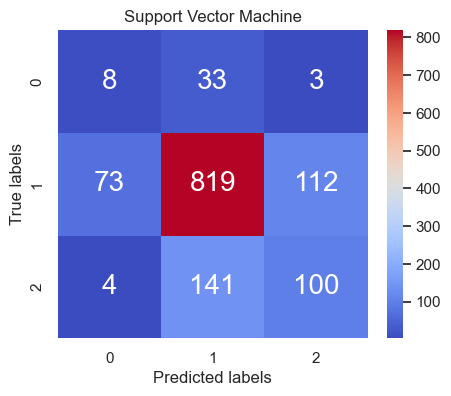

In [87]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='coolwarm',annot_kws={"fontsize":20});  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Support Vector Machine'); 
ax.xaxis.set_ticklabels(['0', '1',"2"]); ax.yaxis.set_ticklabels(['0', '1',"2"]);


# Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [None, 2, 6],
    'min_samples_split': [2, 5]
}
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(predectors, response)
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(test_x)
kappa_score = cohen_kappa_score(y_test, y_pred)

print("Cohen's Kappa Score (Random forest):", kappa_score)

Cohen's Kappa Score (Random forest): 0.33941958484656654


In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.15      0.05      0.07        44
           1       0.84      0.90      0.87      1004
           2       0.54      0.45      0.49       245

    accuracy                           0.79      1293
   macro avg       0.51      0.47      0.48      1293
weighted avg       0.76      0.79      0.77      1293



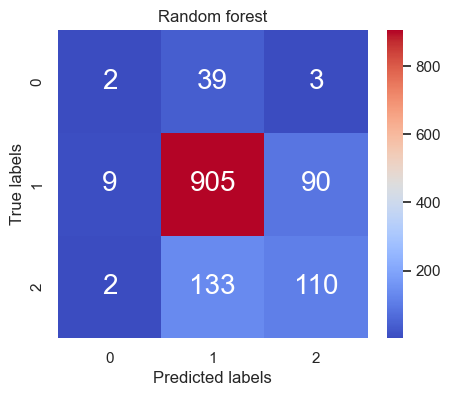

In [93]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='coolwarm',annot_kws={"fontsize":20});  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Random forest'); 
ax.xaxis.set_ticklabels(['0', '1',"2"]); ax.yaxis.set_ticklabels(['0', '1',"2"]);

Text(0.5, 1.0, 'Variable Importance')

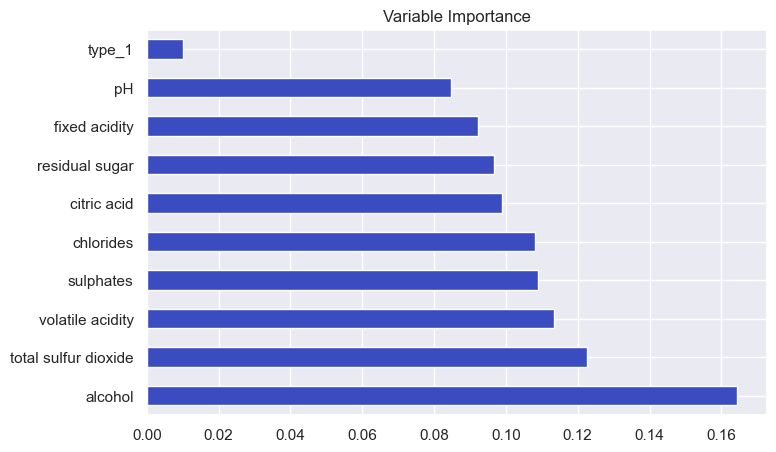

In [92]:
feat_importances = pd.Series(best_rf_model.feature_importances_, index=predectors.columns)
feat_importances.nlargest(10).plot(kind='barh',cmap="coolwarm")
plt.title("Variable Importance")

# Voting Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [95]:
rf = RandomForestClassifier(n_estimators=500,
                                   n_jobs=-1,
                                  min_samples_split=2)
svc = SVC(C=1,gamma=10,probability=True)
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('svc', svc)],
    voting='soft')
voting_clf.fit(predectors, response)
y_pred = voting_clf.predict(test_x)
kappa_score = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score (Random forest):", kappa_score)

Cohen's Kappa Score (Random forest): 0.26468920637677307


In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.25      0.20        44
           1       0.83      0.85      0.84      1004
           2       0.49      0.40      0.44       245

    accuracy                           0.74      1293
   macro avg       0.49      0.50      0.49      1293
weighted avg       0.74      0.74      0.74      1293



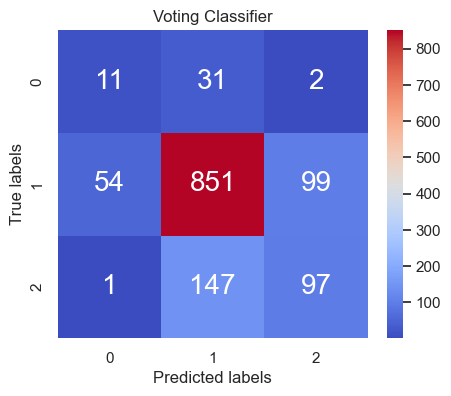

In [97]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='coolwarm',annot_kws={"fontsize":20});  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Voting Classifier'); 
ax.xaxis.set_ticklabels(['0', '1',"2"]); ax.yaxis.set_ticklabels(['0', '1',"2"]);

# Correlation plot 

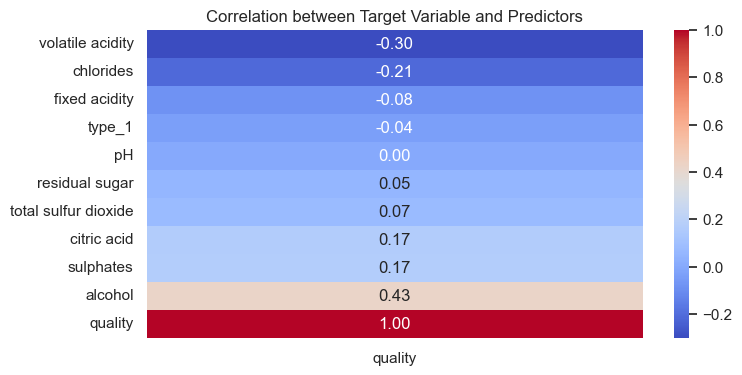

In [98]:
correlation_matrix = df1.corr()

# Select the correlation values between the target variable and predictors
correlation_target = correlation_matrix['quality']
correlation_target = correlation_target.sort_values(ascending=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_target.to_frame(), cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
plt.title("Correlation between Target Variable and Predictors")
plt.show()

# Treating the problem as Regression

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from mord import OrdinalRidge
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score,make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

lower_bound = 0
upper_bound = 10
regressor1 = AdaBoostRegressor(n_estimators=500,learning_rate=0.01)
regressor2 = RandomForestRegressor(n_estimators=500,max_samples=0.8,
                                   max_depth=6, n_jobs=-1,
                                  min_samples_split=4,max_features=0.8)
regressor3 = SVR()

# Create a Voting Classifier
voting_regressor = VotingRegressor(estimators=[('adabost', regressor1), ('rf', regressor2), ('svm', regressor3)])


# Train the model
voting_regressor.fit(predectors, response)
predictions =voting_regressor.predict(test_x)
y_pred_rounded = np.round(predictions)
y_pred = np.clip(y_pred_rounded, lower_bound, upper_bound)
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

In [ ]:
def kappa(estimator,X,y):
    y_predict = estimator.predict(X)
    y_predict = np.round(y_predict,decimals=0).astype(int)
    score = cohen_kappa_score(y,y_predict,weights='quadratic')
    return score
score_catboost = kappa(voting_regressor,test_x,y_test)
print('Majority Regression score = ',score_catboost)

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
errors = np.abs(y_test - y_pred)
mask = errors != 0
X_wrong = test_x[mask]
df_wrong = pd.DataFrame(X_wrong)
df_wrong['error'] = errors[mask]
df_wrong = pd.DataFrame(X_wrong)
df_wrong['y_true'] = y_test[mask]
df_wrong['y_pred'] = y_pred[mask]
df_wrong['error'] = errors[mask]
df_wrong = df_wrong[df_wrong['error'] > 0]
df_wrong['error'] = errors[mask]
df_wrong

In [ ]:
corr_matrix = df_wrong.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',annot_kws={"fontsize":8})
plt.title('Correlation Heatmap')
plt.show()

# Kernel Ridge Regression

In [ ]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'alpha': [0.1],  # Regularization parameter
    'kernel': ["poly"],  # Kernel function
    'gamma': [0.01]  # Kernel coefficient for 'rbf' and 'poly'
}

# Create the Kernel Ridge Regression model
krr = KernelRidge(kernel='rbf', gamma=0.1, alpha=0.01)
krr.fit(predectors, response)

predictions1 = krr.predict(test_x)
y_pred_rounded1 = np.round(predictions1)
y_pred1 = np.clip(y_pred_rounded1, lower_bound, upper_bound)
# Calculate the mean squared error
mse1 = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error: ", mse1)

In [ ]:
def kappa(estimator,X,y):
    y_predict = estimator.predict(X)
    y_predict = np.round(y_predict,decimals=0).astype(int)
    score = cohen_kappa_score(y,y_predict,weights='quadratic')
    return score
score_catboost = kappa(krr,test_x,y_test)
print('Catboost Regression score = ',score_catboost)

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=0.7) 
ridge_model.fit(predectors, response)
predictions = forest.predict(x_test)
y_pred_rounded = np.round(predictions)
y_pred = np.clip(y_pred_rounded, lower_bound, upper_bound)
mse = mean_squared_error(y_test, y_pred)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees in the forest
    'max_depth': [None, 5, 10],               # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be a leaf node
    'max_features': ['sqrt', 'log2', None]    # Number of features to consider at each split
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(train_x, train_y)

# Print the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

In [ ]:
#Building Random forest clasiffy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf = OrdinalClassifier(RandomForestClassifier())
rf.fit(train_x, train_y)

In [ ]:
x_test["type"] = np.where(x_test["type"] == "white", 0, 1)
y_pred = rf.predict(train_x)
accuracy = accuracy_score(train_y, y_pred)
print("Accuracy:", accuracy)

In [ ]:
https://raw.githubusercontent.com/Franosei/Wine-Quality/main/Data/Data_test.csv

In [ ]:
sns.pairplot(data_plot, hue="quality", diag_kind="hist")

In [ ]:
sns.boxplot(data=data, palette="Set2")

In [ ]:
sns.displot(data, x="pH", hue="quality", kind="kde",palette="tab10", fill=True)

In [ ]:
iris = sns.load_dataset("iris")
df = pd.melt(iris, iris.columns[-1], iris.columns[:-1])

g = sns.FacetGrid(df, col="variable", hue="species", col_wrap=2)
g.map(sns.displot, "value")